CSV File: NBA Championship Team Data

In [294]:
import pandas as pd

In [295]:
names = ['year','team', 'game', 'win', 'home', 'mp', 'fg', 'fga','fgp', 'tp', 'tpa', 
         'tpp', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts' ]
nba_df = pd.read_csv("C:\\Users\\achri\\Downloads\\nba-finals-team-stats\\championsdata.csv", header = None, names = names)

In [296]:
nba_df.head(5)

,year,team,game,win,home,mp,fg,fga,fgp,tp,...,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
2,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
3,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
4,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102


In [297]:
nba_df = nba_df.drop([0])

I dropped the first row because it doesn't add anything to the data, it is just a built in header.

In [298]:
cols = ['year', 'game','fgp', 'tpp', 'ftp','mp', 'fg', 'fga', 'tp', 'tpa', 'ft', 'fta',  'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_df[cols] = nba_df[cols].apply(pd.to_numeric, errors='coerce')

I was having a hard time converting my data from objects to floats. I think it was because row [0] was a built-in header, so it added a string to every column. By using errors='coerce' I was able to drop the columns that couldn't be changed to numeric data. Below you can see that in all the columns that were converted to float data only 1 row was dropped. This was row [0]. The exception is TPP (Three Point Percentage), in the column 7 rows were dropped. I will solve this further down.

In [299]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 220
Data columns (total 24 columns):
year    220 non-null int64
team    220 non-null object
game    220 non-null int64
win     220 non-null object
home    220 non-null object
mp      220 non-null int64
fg      220 non-null int64
fga     220 non-null int64
fgp     220 non-null float64
tp      220 non-null int64
tpa     220 non-null int64
tpp     214 non-null float64
ft      220 non-null int64
fta     220 non-null int64
ftp     220 non-null float64
orb     220 non-null int64
drb     220 non-null int64
trb     220 non-null int64
ast     220 non-null int64
stl     220 non-null int64
blk     220 non-null int64
tov     220 non-null int64
pf      220 non-null int64
pts     220 non-null int64
dtypes: float64(3), int64(18), object(3)
memory usage: 43.0+ KB


In [300]:
nba_df.tpp.notnull()

1      False
2       True
3       True
4      False
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13     False
14      True
15      True
16      True
17      True
18     False
19     False
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
       ...  
191     True
192     True
193     True
194     True
195     True
196     True
197     True
198     True
199     True
200     True
201     True
202     True
203     True
204     True
205     True
206     True
207     True
208     True
209     True
210     True
211     True
212     True
213     True
214     True
215     True
216     True
217     True
218     True
219     True
220     True
Name: tpp, Length: 220, dtype: bool

In [301]:
nba_df = nba_df.dropna() 
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 2 to 220
Data columns (total 24 columns):
year    214 non-null int64
team    214 non-null object
game    214 non-null int64
win     214 non-null object
home    214 non-null object
mp      214 non-null int64
fg      214 non-null int64
fga     214 non-null int64
fgp     214 non-null float64
tp      214 non-null int64
tpa     214 non-null int64
tpp     214 non-null float64
ft      214 non-null int64
fta     214 non-null int64
ftp     214 non-null float64
orb     214 non-null int64
drb     214 non-null int64
trb     214 non-null int64
ast     214 non-null int64
stl     214 non-null int64
blk     214 non-null int64
tov     214 non-null int64
pf      214 non-null int64
pts     214 non-null int64
dtypes: float64(3), int64(18), object(3)
memory usage: 41.8+ KB


I decided to drop all the rows that were missing data for TPP. I think dropping them was a good decision because there were so few rows, 6, that it wouldn't make a huge difference in the analysis. Also, there are some games that are played where players do not take many three-point shots. And in the earlier years of the league the three-point shot wasn't utilized nearly as much as it is today. So, I feel good about dropping those six observations.

In [302]:
nba_df.corr()

,year,game,mp,fg,fga,fgp,tp,tpa,tpp,ft,...,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
year,1.000000,-0.023568,0.026591,-0.350204,-0.320238,-0.170612,0.752126,0.813911,0.279260,-0.159291,...,0.033593,-0.348462,0.171403,-0.118614,-0.339809,-0.100288,-0.010258,-0.250300,-0.239669,-0.184558
game,-0.023568,1.000000,-0.116593,-0.094372,-0.072316,-0.056726,0.032519,0.016778,-0.004331,0.097272,...,-0.002473,0.028767,-0.062482,-0.027344,-0.123794,-0.009962,-0.125665,-0.027332,0.124489,-0.029326
mp,0.026591,-0.116593,1.000000,0.197296,0.394209,-0.091161,0.063293,0.057579,0.052886,-0.075530,...,0.009912,0.172692,0.009091,0.131035,0.065897,0.080019,0.031293,0.041061,0.164620,0.165663
fg,-0.350204,-0.094372,0.197296,1.000000,0.709860,0.713529,-0.120282,-0.261782,0.039665,-0.115374,...,0.053340,0.187923,0.085846,0.200951,0.717521,0.248392,0.073883,-0.018226,0.271351,0.843732
fga,-0.320238,-0.072316,0.394209,0.709860,1.000000,0.019087,-0.148599,-0.150256,-0.123949,-0.153894,...,0.047872,0.585831,0.055375,0.463368,0.457271,0.251741,0.058786,-0.028849,0.333679,0.543368
fgp,-0.170612,-0.056726,-0.091161,0.713529,0.019087,1.000000,-0.011676,-0.215699,0.184681,-0.008134,...,0.033350,-0.309990,0.059007,-0.177338,0.558374,0.109049,0.039846,0.004242,0.063042,0.661981
tp,0.752126,0.032519,0.063293,-0.120282,-0.148599,-0.011676,1.000000,0.882064,0.538219,-0.169107,...,0.014894,-0.338685,0.090358,-0.173862,-0.019885,-0.060456,-0.045836,-0.239857,-0.148294,0.100423
tpa,0.813911,0.016778,0.057579,-0.261782,-0.150256,-0.215699,0.882064,1.000000,0.233968,-0.193115,...,0.022065,-0.267700,0.092666,-0.121098,-0.175982,-0.086073,-0.044005,-0.242001,-0.143836,-0.079893
tpp,0.279260,-0.004331,0.052886,0.039665,-0.123949,0.184681,0.538219,0.233968,1.000000,-0.045968,...,-0.062409,-0.279714,-0.017004,-0.213993,0.066046,-0.001046,0.000665,-0.195835,0.016229,0.174953
ft,-0.159291,0.097272,-0.075530,-0.115374,-0.153894,-0.008134,-0.169107,-0.193115,-0.045968,1.000000,...,0.368699,0.031321,0.079011,0.083207,0.007108,0.049442,0.004308,-0.079882,0.152993,0.350020


In [303]:
nba_df.describe()

,year,game,mp,fg,fga,fgp,tp,tpa,tpp,ft,...,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1999.359813,3.411215,242.453271,37.528037,80.579439,0.465589,5.504673,15.014019,0.342168,19.920561,...,0.734336,12.154206,30.130841,42.285047,22.322430,7.803738,5.228972,13.556075,22.813084,100.481308
std,11.064746,1.722283,8.554447,6.252636,9.461101,0.054388,3.989126,9.223098,0.171087,6.781516,...,0.106490,4.589185,4.908714,6.388668,6.085754,2.935741,2.714749,3.783351,4.411106,13.325366
min,1980.000000,1.000000,240.000000,25.000000,62.000000,0.289000,0.000000,1.000000,0.000000,5.000000,...,0.368000,3.000000,16.000000,22.000000,11.000000,1.000000,0.000000,4.000000,12.000000,71.000000
25%,1990.000000,2.000000,240.000000,33.000000,75.000000,0.429000,2.000000,8.000000,0.250000,15.000000,...,0.667000,9.000000,27.000000,38.000000,18.000000,6.000000,3.000000,11.000000,20.000000,90.000000
50%,1999.000000,3.000000,240.000000,37.000000,80.000000,0.465000,5.000000,15.000000,0.358500,19.000000,...,0.739000,11.500000,30.000000,42.000000,21.000000,8.000000,5.000000,13.000000,23.000000,100.000000
75%,2009.000000,5.000000,240.000000,42.000000,86.000000,0.500000,8.000000,20.000000,0.444000,24.000000,...,0.817250,15.000000,33.000000,47.000000,26.000000,10.000000,7.000000,16.000000,26.000000,109.000000
max,2018.000000,7.000000,315.000000,56.000000,130.000000,0.617000,18.000000,43.000000,1.000000,43.000000,...,1.000000,27.000000,44.000000,59.000000,44.000000,18.000000,14.000000,26.000000,33.000000,141.000000


In [304]:
nba_df['team'].value_counts()

Lakers       53
Bulls        35
Spurs        27
Celtics      25
Heat         17
Pistons      14
Warriors     14
Rockets      11
Cavaliers     7
Mavericks     6
Sixers        3
Heat'         1
Warriorrs     1
Name: team, dtype: int64

In [305]:
nba_df['team'] = nba_df['team'].replace(to_replace = 'Warriorrs',value = 'Warriors')
nba_df['team'] = nba_df['team'].replace(to_replace = "Heat'",value = 'Heat')
nba_df['team'].value_counts()

Lakers       53
Bulls        35
Spurs        27
Celtics      25
Heat         18
Warriors     15
Pistons      14
Rockets      11
Cavaliers     7
Mavericks     6
Sixers        3
Name: team, dtype: int64

This was a simple and quick way to show how the NBA Championships are distributed among teams. It also showed me that I had a couple spelling errors in my data. One observation for the Warriors and one for the Heat were incorrect and I was able to find and replace these errors with the correct team name.

In [306]:
nba_df.groupby(['team'])['ftp'].mean()

team
Bulls        0.728714
Cavaliers    0.725714
Celtics      0.776280
Heat         0.718167
Lakers       0.715642
Mavericks    0.775167
Pistons      0.737857
Rockets      0.758818
Sixers       0.698000
Spurs        0.709481
Warriors     0.781467
Name: ftp, dtype: float64

In [307]:
nba_df.groupby(['team'])['tpp'].mean()

team
Bulls        0.340029
Cavaliers    0.328143
Celtics      0.311000
Heat         0.387500
Lakers       0.315264
Mavericks    0.410167
Pistons      0.381500
Rockets      0.339727
Sixers       0.000000
Spurs        0.386000
Warriors     0.373733
Name: tpp, dtype: float64

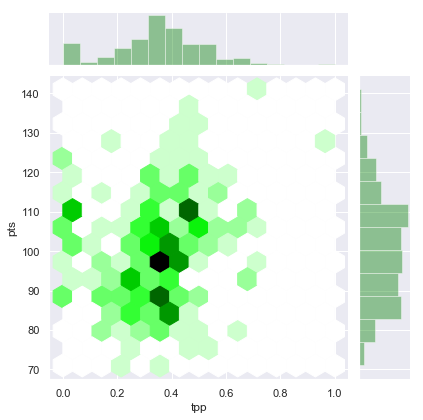

In [308]:
import seaborn as sns
sns.jointplot(nba_df.tpp, nba_df.pts, kind="hex", color = 'green')

Here I wanted to see the relationship betwee total points and three point percentage. It is positive, as expected. But not as strong of a relationship as I would have expected.

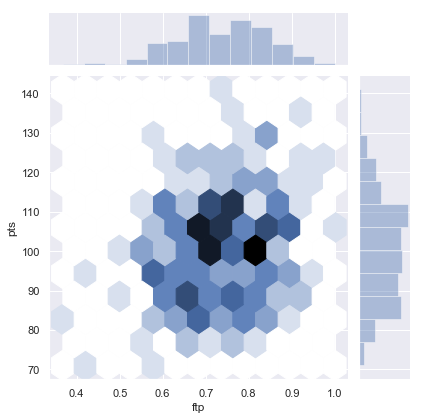

In [309]:
sns.jointplot(nba_df.ftp, nba_df.pts, kind="hex")

Here I wanted to see the relationship between total points and free throw percentage. The relationship is stronger than the 
earlier graph. So maybe free throws are more important thatn three point shots. That is useful information to have as a coach or player.

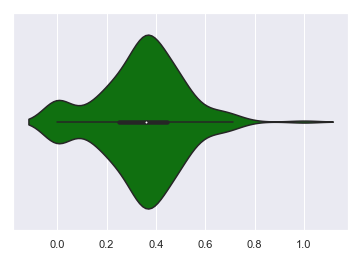

In [310]:
sns.violinplot(nba_df[['tpp']], color = 'green')

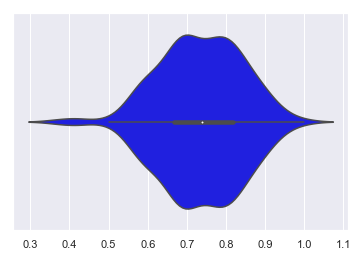

In [311]:
sns.violinplot(nba_df[['ftp']], color = 'blue')

I wanted to try using the violin plot because it isn't used very often. It doesn't show anything new but it is a nice way to show the distribution of Free Throw Percentage and Three Point Percentage.

JSON DATA: CRIME

In [312]:
import json
import requests

In [313]:
get_request = requests.get('http://api.nobelprize.org/v1/prize.json')

In [314]:
get_request.text;

In [315]:
nobel_dict = json.loads(get_request.text)

In [316]:
nobel_dict.keys()

dict_keys(['prizes'])

In [317]:
nobel_df = pd.DataFrame(nobel_dict['prizes'])
nobel_df.head()

,category,laureates,overallMotivation,year
0,physics,"[{'id': '960', 'firstname': 'Arthur', 'surname...",“for groundbreaking inventions in the field of...,2018
1,chemistry,"[{'id': '963', 'firstname': 'Frances H.', 'sur...",NaN,2018
2,medicine,"[{'id': '958', 'firstname': 'James P.', 'surna...",NaN,2018
3,peace,"[{'id': '966', 'firstname': 'Denis', 'surname'...",NaN,2018
4,economics,"[{'id': '968', 'firstname': 'William D.', 'sur...",NaN,2018


I imported the JSON data and turned it into a data table. But the laureates column stayed in dictionary format. It must have been a dictionary inside of a dictionary. But I couldn't do any kind of analysis with the data this way. 

In [318]:
la_df = pd.DataFrame(nobel_df['laureates'].values.tolist(), index=nobel_df.index)
print (la_df)

                                                     0  \
0    {'id': '960', 'firstname': 'Arthur', 'surname'...   
1    {'id': '963', 'firstname': 'Frances H.', 'surn...   
2    {'id': '958', 'firstname': 'James P.', 'surnam...   
3    {'id': '966', 'firstname': 'Denis', 'surname':...   
4    {'id': '968', 'firstname': 'William D.', 'surn...   
5    {'id': '941', 'firstname': 'Rainer', 'surname'...   
6    {'id': '944', 'firstname': 'Jacques', 'surname...   
7    {'id': '938', 'firstname': 'Jeffrey C.', 'surn...   
8    {'id': '947', 'firstname': 'Kazuo', 'surname':...   
9    {'id': '948', 'firstname': 'International Camp...   
10   {'id': '949', 'firstname': 'Richard H.', 'surn...   
11   {'id': '928', 'firstname': 'David J.', 'surnam...   
12   {'id': '931', 'firstname': 'Jean-Pierre', 'sur...   
13   {'id': '927', 'firstname': 'Yoshinori', 'surna...   
14   {'id': '937', 'firstname': 'Bob', 'surname': '...   
15   {'id': '934', 'firstname': 'Juan Manuel', 'sur...   
16   {'id': '9

In [319]:
la_df = pd.DataFrame(la_df[0].tolist())

In [320]:
la_df.head()

,firstname,id,motivation,share,surname
0,Arthur,960,"""for the optical tweezers and their applicatio...",2,Ashkin
1,Frances H.,963,"""for the directed evolution of enzymes""",2,Arnold
2,James P.,958,"""for their discovery of cancer therapy by inhi...",2,Allison
3,Denis,966,"""for their efforts to end the use of sexual vi...",2,Mukwege
4,William D.,968,"""for integrating climate change into long-run ...",2,Nordhaus


I had to separate "laureates" into its own data table, then sperate all the values into separate columns. This way I was able to break the data out of the dictionary format.

In [321]:
nprize =pd.concat([nobel_df, la_df], axis=1)
nprize.head()

,category,laureates,overallMotivation,year,firstname,id,motivation,share,surname
0,physics,"[{'id': '960', 'firstname': 'Arthur', 'surname...",“for groundbreaking inventions in the field of...,2018,Arthur,960,"""for the optical tweezers and their applicatio...",2,Ashkin
1,chemistry,"[{'id': '963', 'firstname': 'Frances H.', 'sur...",NaN,2018,Frances H.,963,"""for the directed evolution of enzymes""",2,Arnold
2,medicine,"[{'id': '958', 'firstname': 'James P.', 'surna...",NaN,2018,James P.,958,"""for their discovery of cancer therapy by inhi...",2,Allison
3,peace,"[{'id': '966', 'firstname': 'Denis', 'surname'...",NaN,2018,Denis,966,"""for their efforts to end the use of sexual vi...",2,Mukwege
4,economics,"[{'id': '968', 'firstname': 'William D.', 'sur...",NaN,2018,William D.,968,"""for integrating climate change into long-run ...",2,Nordhaus


In [322]:
nprize = nprize.drop(['laureates', 'overallMotivation', 'motivation'], axis=1)

In [323]:
nprize.head()

,category,year,firstname,id,share,surname
0,physics,2018,Arthur,960,2,Ashkin
1,chemistry,2018,Frances H.,963,2,Arnold
2,medicine,2018,James P.,958,2,Allison
3,peace,2018,Denis,966,2,Mukwege
4,economics,2018,William D.,968,2,Nordhaus


After fixing the laureate column data, I had to add it back to the other data. This added the ID, first name, surname, and share columns to the data. After extracting the data, I could drop the data I did not need. I dropped the motivation and overallMotivation columns because I don't need them for the analysis. I also dropped the laureate’s column because that only contained the compressed dictionary data, and after the extraction I did not need it anymore.

In [324]:
nprize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
category     590 non-null object
year         590 non-null object
firstname    590 non-null object
id           590 non-null object
share        590 non-null object
surname      590 non-null object
dtypes: object(6)
memory usage: 27.7+ KB


In [325]:
nprize[["id",'share','year']] = nprize[["id",'share','year']].apply(pd.to_numeric)

In [326]:
nprize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
category     590 non-null object
year         590 non-null int64
firstname    590 non-null object
id           590 non-null int64
share        590 non-null int64
surname      590 non-null object
dtypes: int64(3), object(3)
memory usage: 27.7+ KB


In [327]:
nprize['category'] = nprize['category'].astype('category')

I was able to change the data types from objects to integers or category. I did this to make graphing and visualizing the data possible.

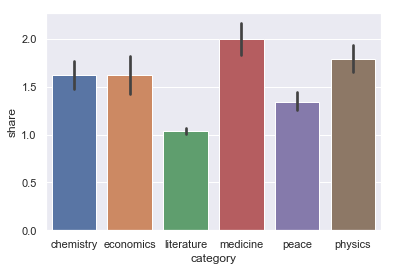

In [328]:
sns.barplot(nprize.category, nprize.share)

This graph represents how many prizes are shared among multiple people across categories. Medicine apparently has more groups of prize winners than literature, which generally just has one. 

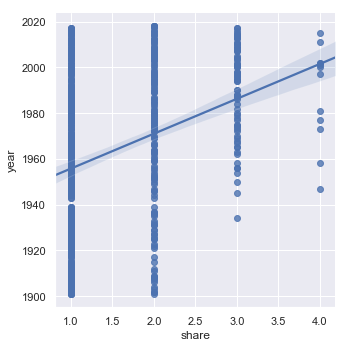

In [329]:
sns.lmplot(x="share", y="year", data=nprize)

This plot shows the positive trend of shared Nobel prizes across time. It is more common today to have groups win the Nobel prize than it was back in the 1900s.

SQL DATA:

In [330]:
import sqlite3
import pandas as pd

In [331]:
conn = sqlite3.connect("C:\\Users\\achri\\Downloads\\footballdelphi\\database.sqlite")
del_df = pd.read_sql_query("select * from Teams;", conn)
del_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [332]:
mat_df = pd.read_sql_query("select * from Matches;", conn)
mat_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [333]:
pd.read_sql_query("""select Match_ID, FTHG, FTAG, FTR from Matches
                    group by Match_ID 
                    order by MAtch_ID
                    limit 10""", conn)

,Match_ID,FTHG,FTAG,FTR
0,1,2,1,H
1,2,0,1,A
2,3,1,1,D
3,4,2,1,H
4,5,1,3,A
5,6,1,1,D
6,7,2,0,H
7,8,0,1,A
8,9,2,0,H
9,10,2,1,H


In [334]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
Season                    468 non-null object
TeamName                  468 non-null object
KaderHome                 468 non-null object
AvgAgeHome                468 non-null object
ForeignPlayersHome        468 non-null object
OverallMarketValueHome    468 non-null object
AvgMarketValueHome        468 non-null object
StadiumCapacity           468 non-null object
dtypes: object(8)
memory usage: 29.3+ KB


In [335]:
del_df['KaderHome'] = pd.to_numeric(del_df['KaderHome'])
del_df['AvgAgeHome'] = pd.to_numeric(del_df['AvgAgeHome'])
del_df['ForeignPlayersHome'] = pd.to_numeric(del_df['ForeignPlayersHome'])
del_df['OverallMarketValueHome'] = pd.to_numeric(del_df['OverallMarketValueHome'])
del_df['AvgMarketValueHome'] = pd.to_numeric(del_df['AvgMarketValueHome'])
del_df['StadiumCapacity'] = pd.to_numeric(del_df['StadiumCapacity'])

In [336]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
Season                    468 non-null object
TeamName                  468 non-null object
KaderHome                 468 non-null int64
AvgAgeHome                468 non-null int64
ForeignPlayersHome        468 non-null int64
OverallMarketValueHome    468 non-null int64
AvgMarketValueHome        468 non-null int64
StadiumCapacity           468 non-null int64
dtypes: int64(6), object(2)
memory usage: 29.3+ KB


In [337]:
del_df.columns[del_df.isnull().any()]

Index([], dtype='object')

I used the above code to test if there were any missing values in the data set. Luckily, there are none so no need to drop anything. I test for outliers below.

In [338]:
q_df = del_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0.25,29.0,24.0,10.750,15322500.0,505500.0,47728.0
0.75,33.0,25.0,17.000,74870000.0,2300000.0,49827.0
iqr,4.0,1.0,6.250,59547500.0,1794500.0,2099.0
whisker_length,6.0,1.5,9.375,89321250.0,2691750.0,3148.5
max_whisker,39.0,26.5,26.375,164191250.0,4991750.0,52975.5
min_whisker,23.0,22.5,1.375,-73998750.0,-2186250.0,44579.5


This chart shows the max and min values of each observation in the data table. This way I can check to see if these values fall outside three standard deviations of the mean. If they do I will drop them from the data.

In [339]:
std_KaderHome = del_df['KaderHome'].std()
std_KaderHome

3.689485778947354

In [340]:
max_outlier_KaderHome_value = del_df['KaderHome'].mean() + (std_KaderHome * 3)
max_outlier_KaderHome_value

42.50221802060275

In [341]:
max_outlier_KaderHome_value = del_df['KaderHome'].mean() - (std_KaderHome * 3)
max_outlier_KaderHome_value

20.365303346918623

In [342]:
std_AvgAgeHome = del_df['AvgAgeHome'].std()
std_AvgAgeHome

1.0175710630846935

In [343]:
max_outlier_AvgAgeHome_value = del_df['AvgAgeHome'].mean() + (std_AvgAgeHome * 3)
max_outlier_AvgAgeHome_value

27.60826874480964

In [344]:
max_outlier_AvgAgeHome_value = del_df['AvgAgeHome'].mean() - (std_AvgAgeHome * 3)
max_outlier_AvgAgeHome_value

21.502842366301476

In [345]:
std_ForeignPlayersHome = del_df['ForeignPlayersHome'].std()
std_ForeignPlayersHome

4.711153367264869

In [346]:
max_outlier_ForeignPlayersHome_value = del_df['ForeignPlayersHome'].mean() + (std_ForeignPlayersHome * 3)
max_outlier_ForeignPlayersHome_value

27.763801982136485

In [347]:
max_outlier_ForeignPlayersHome_value = del_df['ForeignPlayersHome'].mean() - (std_ForeignPlayersHome * 3)
max_outlier_ForeignPlayersHome_value

-0.5031182214527252

In [348]:
std_OverallMarketValueHome = del_df['OverallMarketValueHome'].std()
std_OverallMarketValueHome

82203101.17631589

In [349]:
max_outlier_OverallMarketValueHome_value = del_df['OverallMarketValueHome'].mean() + (std_OverallMarketValueHome * 3)
max_outlier_OverallMarketValueHome_value

307417829.1699733

In [350]:
max_outlier_OverallMarketValueHome_value = del_df['OverallMarketValueHome'].mean() - (std_OverallMarketValueHome * 3)
max_outlier_OverallMarketValueHome_value

-185800777.88792202

In [351]:
std_AvgMarketValueHome = del_df['AvgMarketValueHome'].std()
std_AvgMarketValueHome

2665017.3921344006

In [352]:
max_outlier_AvgMarketValueHome_value = del_df['AvgMarketValueHome'].mean() + (std_AvgMarketValueHome * 3)
max_outlier_AvgMarketValueHome_value

9926321.407172432

In [353]:
max_outlier_AvgMarketValueHome_value = del_df['AvgMarketValueHome'].mean() - (std_AvgMarketValueHome * 3)
max_outlier_AvgMarketValueHome_value

-6063782.945633971

In [354]:
std_StadiumCapacity = del_df['StadiumCapacity'].std()
std_StadiumCapacity

12483.479139651408

In [355]:
max_outlier_StadiumCapacity_value = del_df['StadiumCapacity'].mean() + (std_StadiumCapacity * 3)
max_outlier_StadiumCapacity_value

85178.53143604824

In [356]:
max_outlier_StadiumCapacity_value = del_df['StadiumCapacity'].mean() - (std_StadiumCapacity * 3)
max_outlier_StadiumCapacity_value

10277.656598139787

This probably wasn't the most efficient way to test if there were any outliers, but I tested each variable to see if it was outside three standard deviations from the average. None of the observations fall outside of that range, so I will not need to drop any observations.

In [357]:
import seaborn as sns

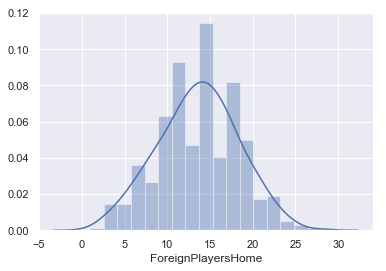

In [358]:
sns.distplot(del_df.ForeignPlayersHome, kde=True)

This represents the distribution of foreign players on any specific team. It is easy to see that the distribution is normal and the mean falls around 15 foreign players.

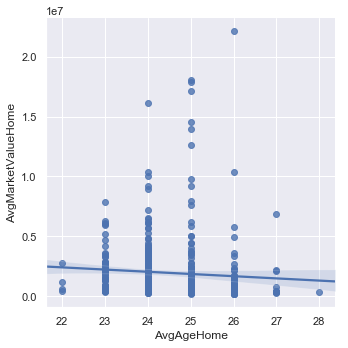

In [359]:
sns.lmplot(x="AvgAgeHome", y="AvgMarketValueHome", data=del_df)

This is interesting. The average age of a player has a negative relationship with the average market value of the team. I makes sense becuase older players are worth less than new, upcoming stars on average. 

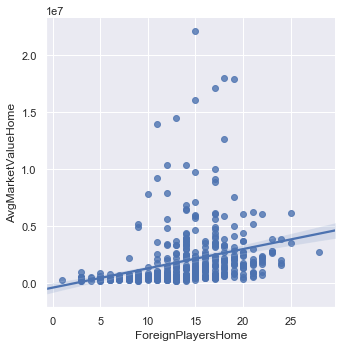

In [360]:
sns.lmplot(x="ForeignPlayersHome", y="AvgMarketValueHome", data=del_df)

On the other hand hte number of foreigh players on a team has a positive relationship with the average market value. I would guess that would be because foreign players are likely star players that the team had to trade to get most of the time. Meaning they are high calibur, talented players that will make the team better.